<h1>
<font color='white'>step1 import library and data set</font</h1>>>

In [2]:
#step1 import library and data set
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Data//housing.csv")

<h1>
<font color='gray'>step2 :  Explore  Data Set</font></h1>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#remove null values of    total_bedrooms  
data.dropna(inplace=True)



In [6]:
data.info()#inplace remove the null data and update the data directly

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [48]:
x_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2)#test size means 20% of data is used in training

In [50]:
train_data=x_train.join(y_train)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

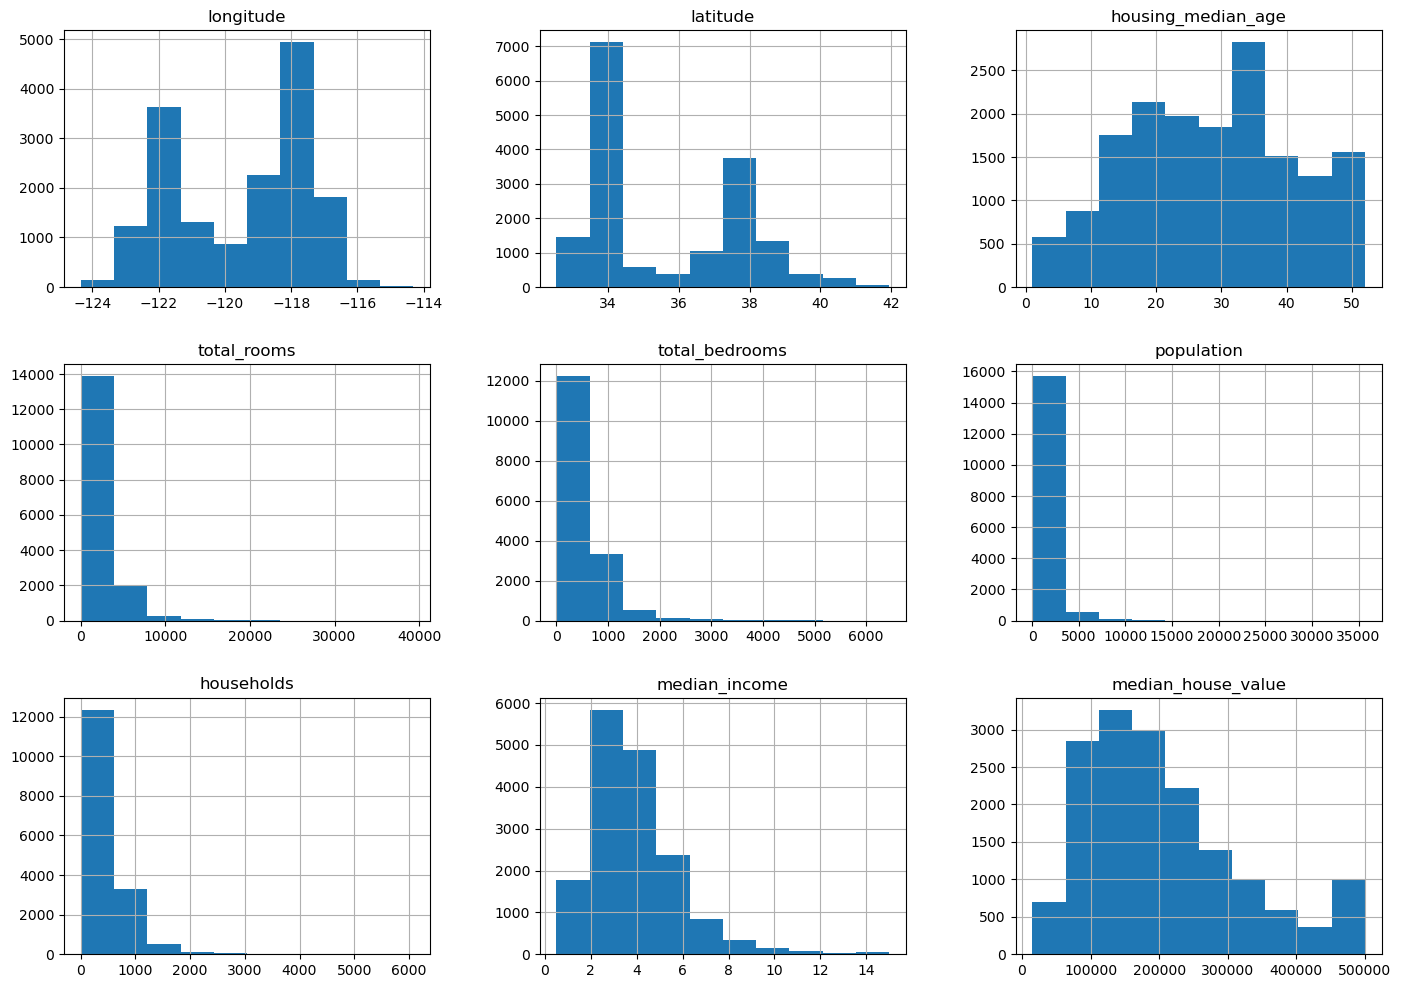

In [52]:
train_data.hist(figsize=(17,12))

<Axes: >

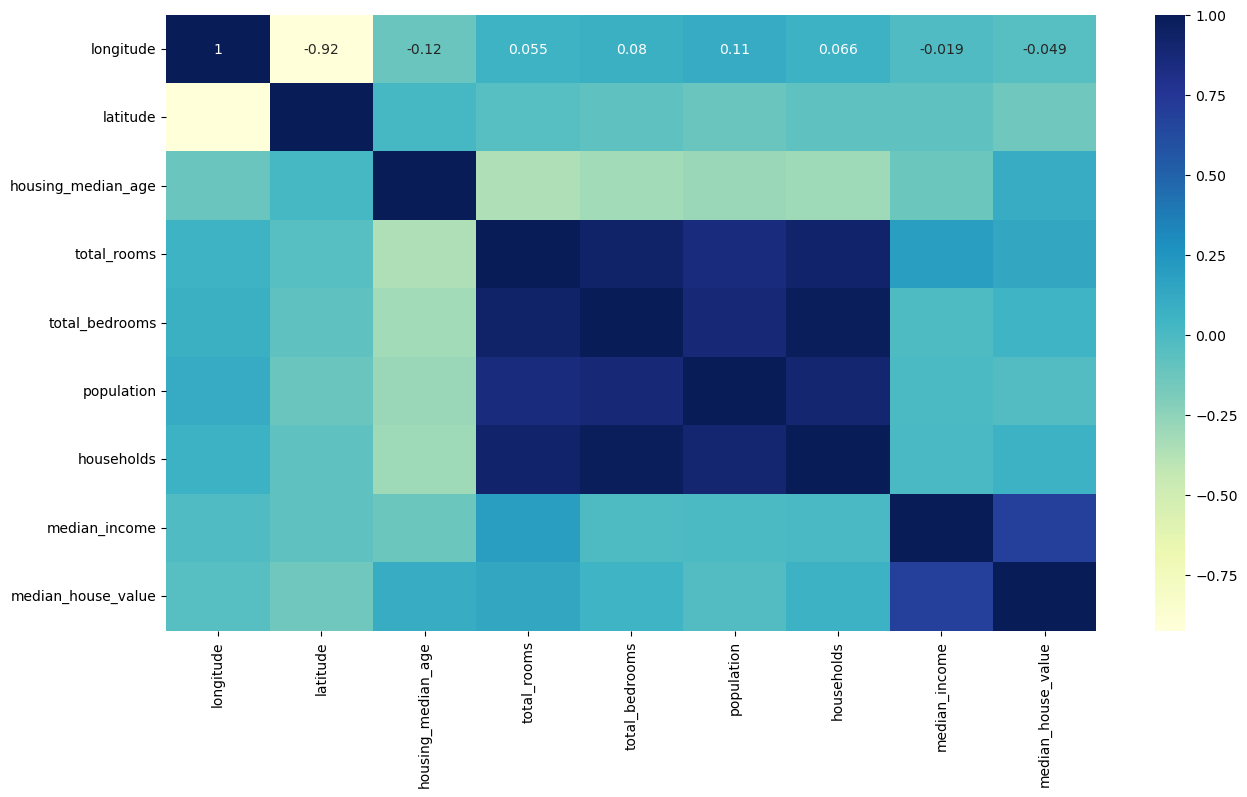

In [53]:
num=train_data.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))
corri=num.corr()
sns.heatmap(corri,annot=True,cmap="YlGnBu")


<h1>
<font color='green'>Step3 :Data Preprocesssing</font></h1>

In [55]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14312,-117.14,32.70,32.0,1280.0,353.0,1335.0,330.0,1.6023,NEAR OCEAN,77300.0
19761,-122.17,40.11,24.0,1631.0,340.0,1042.0,333.0,1.7708,INLAND,59000.0
14814,-117.17,32.70,33.0,4084.0,897.0,1804.0,833.0,4.0488,NEAR OCEAN,409700.0
2014,-119.79,36.72,19.0,1719.0,391.0,1369.0,368.0,1.2500,INLAND,53000.0
15518,-117.08,33.14,19.0,2629.0,494.0,1444.0,503.0,3.5462,<1H OCEAN,156800.0
...,...,...,...,...,...,...,...,...,...,...
11225,-117.94,33.81,34.0,1290.0,203.0,664.0,204.0,5.8461,<1H OCEAN,227400.0
9170,-118.70,34.53,5.0,14275.0,2474.0,7158.0,2311.0,5.4284,INLAND,236300.0
19755,-122.21,40.18,30.0,744.0,156.0,410.0,165.0,2.1898,INLAND,63200.0
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,<1H OCEAN,258200.0


In [56]:
#check skewness that the data is bell curve or not
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

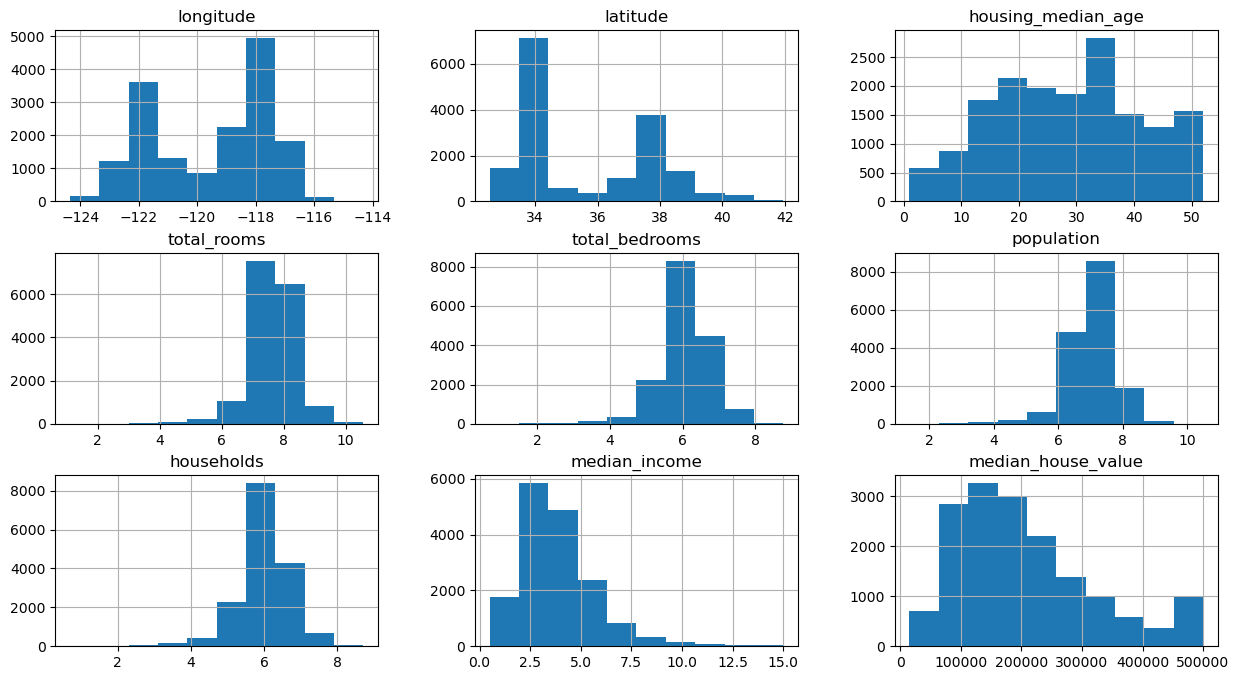

In [57]:
train_data.hist(figsize=(15,8))

In [58]:
train_data.ocean_proximity.value_counts()
pro=pd.get_dummies(train_data.ocean_proximity)# Convert categorical column 'ocean_proximity' to dummy variables
#(train_data.join(pro)).drop(["ocean_proximity"],axis=1)  already done

In [59]:
#(train_data.join(pro)).drop(["ocean_proximity"],axis=1)  already done

In [60]:
train_data.head(-30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14312,-117.14,32.70,32.0,7.155396,5.869297,7.197435,5.802118,1.6023,NEAR OCEAN,77300.0
19761,-122.17,40.11,24.0,7.397562,5.831882,6.949856,5.811141,1.7708,INLAND,59000.0
14814,-117.17,32.70,33.0,8.315077,6.800170,7.498316,6.726233,4.0488,NEAR OCEAN,409700.0
2014,-119.79,36.72,19.0,7.450080,5.971262,7.222566,5.910797,1.2500,INLAND,53000.0
15518,-117.08,33.14,19.0,7.874739,6.204558,7.275865,6.222576,3.5462,<1H OCEAN,156800.0
...,...,...,...,...,...,...,...,...,...,...
15902,-122.41,37.75,52.0,7.833996,6.327937,7.266129,6.167516,3.4073,NEAR BAY,254700.0
18427,-121.83,37.25,17.0,7.754910,6.458338,7.400621,6.436150,3.1932,<1H OCEAN,123400.0
2002,-119.78,36.75,31.0,7.247793,5.940171,7.323831,5.961005,1.2813,INLAND,56400.0
15564,-117.05,33.11,18.0,8.387995,6.466145,7.647786,6.519147,5.4786,<1H OCEAN,223500.0


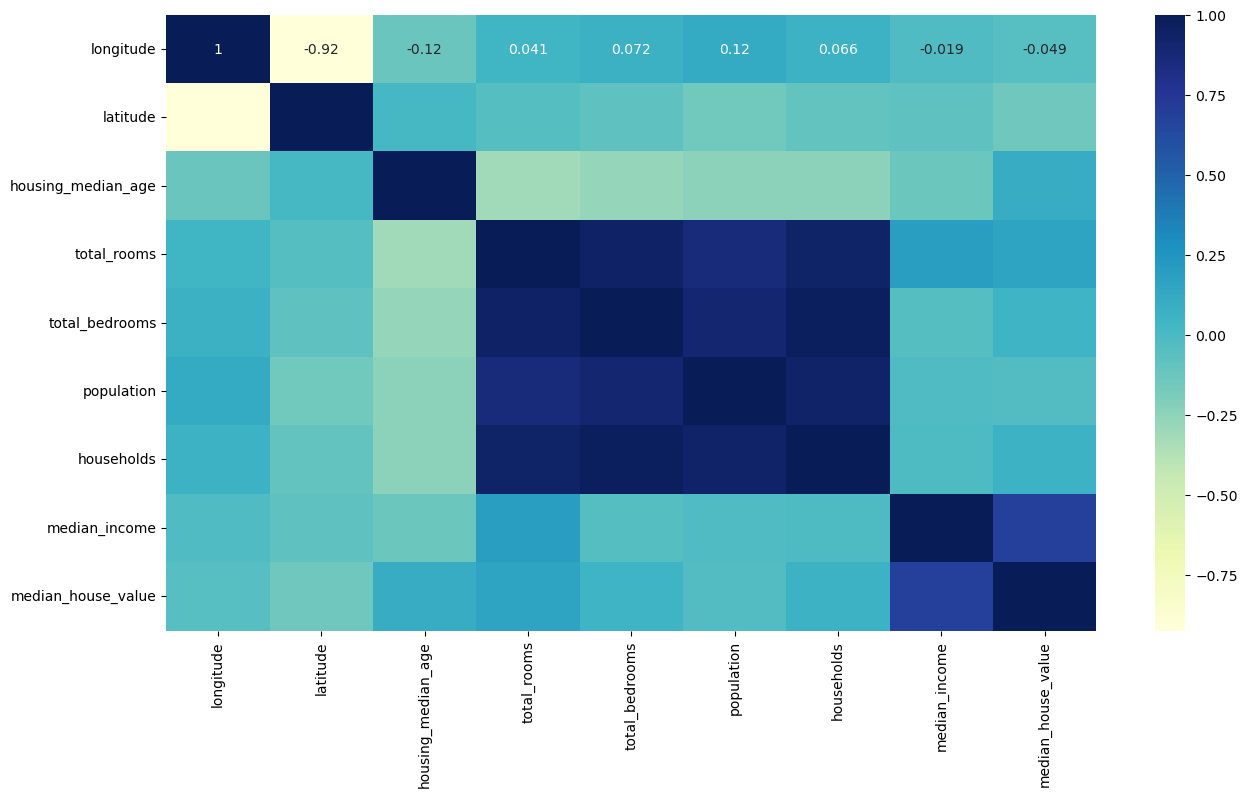

In [61]:
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corri = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corri, annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

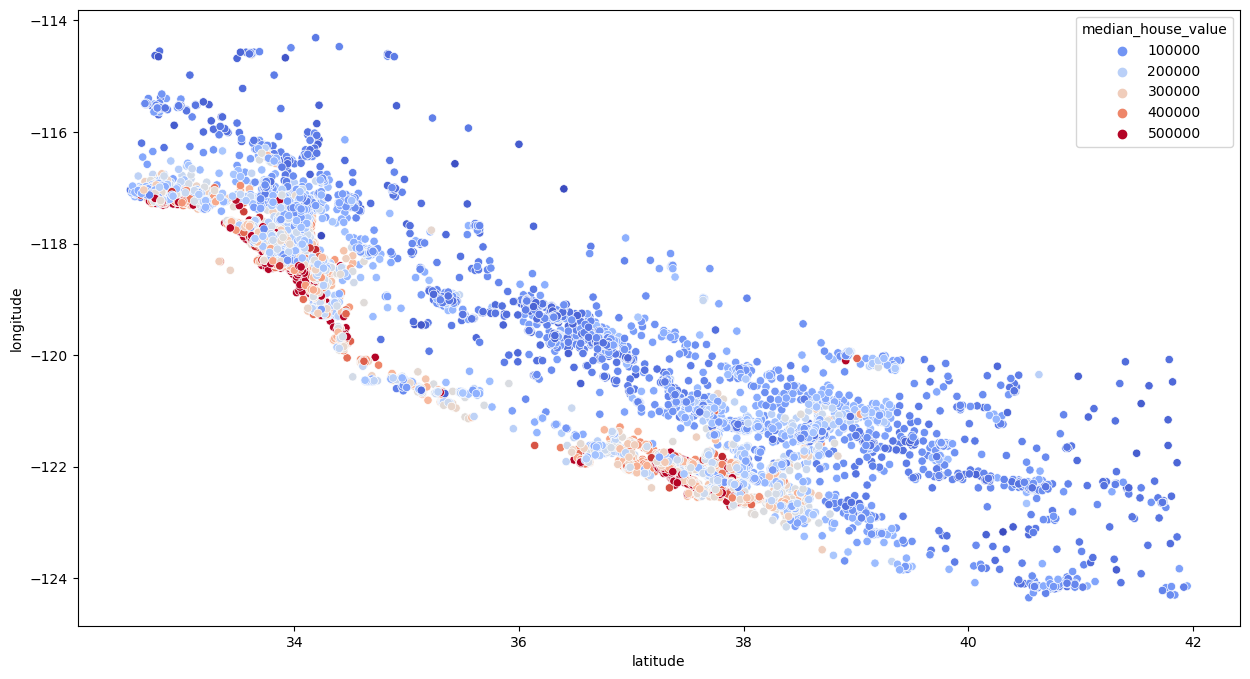

In [63]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

<h1><font color='pink'>Step4 :Feature Engineering</font></h1>

In [66]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_room']=train_data['total_rooms']/train_data['households']
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14312    -117.14     32.70                32.0     7.155396        5.869297   
19761    -122.17     40.11                24.0     7.397562        5.831882   
14814    -117.17     32.70                33.0     8.315077        6.800170   
2014     -119.79     36.72                19.0     7.450080        5.971262   
15518    -117.08     33.14                19.0     7.874739        6.204558   
...          ...       ...                 ...          ...             ...   
11225    -117.94     33.81                34.0     7.163172        5.318120   
9170     -118.70     34.53                 5.0     9.566335        7.813996   
19755    -122.21     40.18                30.0     6.613384        5.056246   
10142    -117.89     33.90                23.0     7.335634        5.424950   
12759    -121.39     38.62                27.0     8.647168        7.305188   

       population  households  median_income ocean_

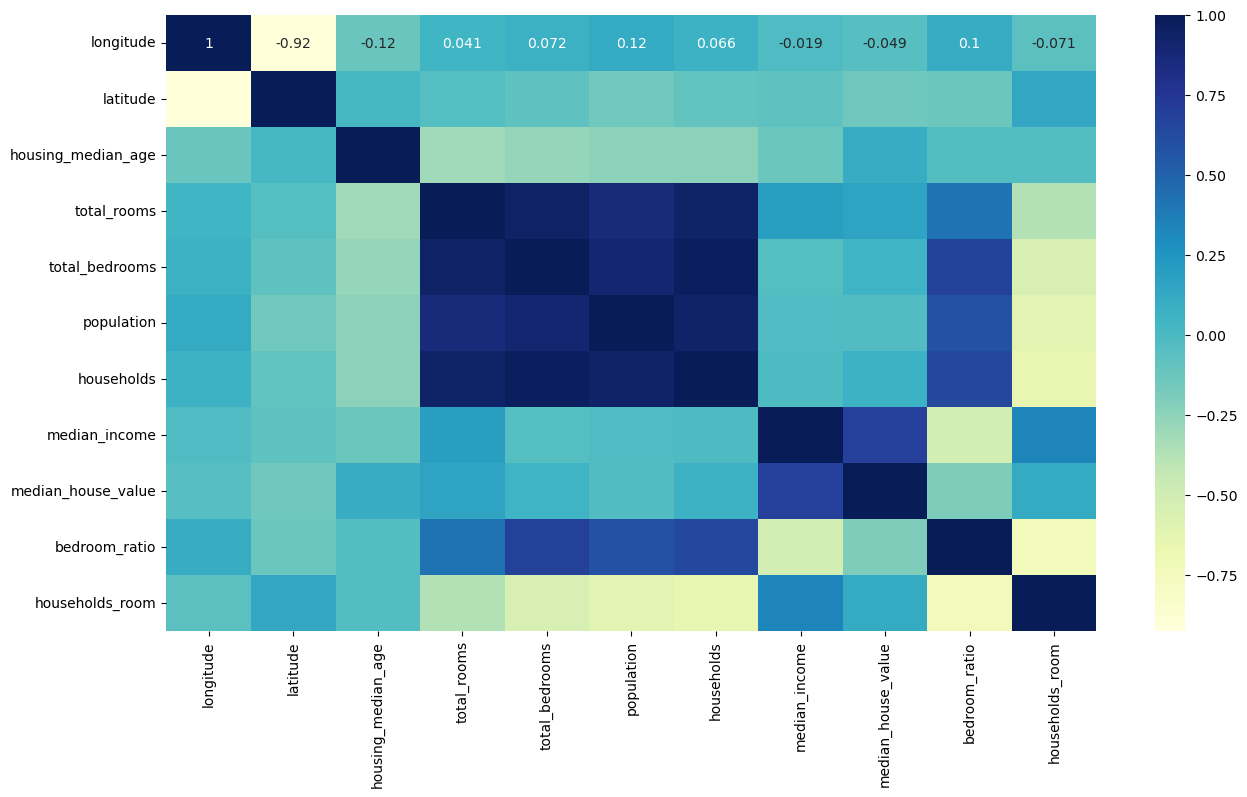

In [69]:
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corri = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corri, annot=True, cmap="YlGnBu")
plt.show()

<h1><font color='Brown'>Step5 :Model Training</font></h1>

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
X_train= train_data.drop(['median_house_value'], axis=1)  # Features (num_bedrooms, square_footage, location)
y_train = train_data['median_house_value']  # Target variable (price)

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X_train)

# Split the data into training and testing sets



# Create a Linear Regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_encoded, y_train)



LinearRegression()

In [76]:
X_test= train_data.drop(['median_house_value'], axis=1)  # Features (num_bedrooms, square_footage, location)
y_test = train_data['median_house_value']
test_data=X_test.join(y_test)
#check skewness that the data is bell curve or not
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['households']=np.log(test_data['households']+1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_room']=test_data['total_rooms']/test_data['households']

#test_data.ocean_proximity.value_counts()
#test_data.ocean_proximity.value_counts()
#pro=pd.get_dummies(test_data.ocean_proximity)# Convert categorical column 'ocean_proximity' to dummy variables
#(test_data.join(pro)).drop(["ocean_proximity"],axis=1) # already done
#pro=pd.get_dummies(test_data.ocean_proximity)# Convert categorical column 'ocean_proximity' to dummy variables

In [78]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_ratio,households_room,median_house_value
14312,-117.14,32.70,32.0,2.098680,1.927062,2.103821,1.917234,1.6023,NEAR OCEAN,0.918226,1.094639,77300.0
19761,-122.17,40.11,24.0,2.127941,1.921600,2.073154,1.918560,1.7708,INLAND,0.903033,1.109135,59000.0
14814,-117.17,32.70,33.0,2.231634,2.054146,2.139868,2.044621,4.0488,NEAR OCEAN,0.920467,1.091466,409700.0
2014,-119.79,36.72,19.0,2.134176,1.941796,2.106882,1.933085,1.2500,INLAND,0.909858,1.104026,53000.0
15518,-117.08,33.14,19.0,2.183209,1.974714,2.113343,1.977212,3.5462,<1H OCEAN,0.904501,1.104186,156800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11225,-117.94,33.81,34.0,2.099633,1.843422,2.014875,1.844195,5.8461,<1H OCEAN,0.877973,1.138509,227400.0
9170,-118.70,34.53,5.0,2.357673,2.176341,2.290120,2.168581,5.4284,INLAND,0.923089,1.087196,236300.0
19755,-122.21,40.18,30.0,2.029908,1.801090,1.948563,1.810252,2.1898,INLAND,0.887277,1.121340,63200.0
10142,-117.89,33.90,23.0,2.120540,1.860189,2.020550,1.862904,7.8980,<1H OCEAN,0.877224,1.138298,258200.0


In [80]:
X_test= test_data.drop(['median_house_value'], axis=1)  # Features (num_bedrooms, square_footage, location)
y_test = test_data['median_house_value']  # Target variable (price)

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X_test)


In [84]:
reg.score(X_encoded,y_test)a

0.06117017658624546

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the Data
X_train = train_data.drop(['median_house_value'], axis=1)  # Features
y_train = train_data['median_house_value']  # Target variable

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X_train)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Add a column of ones to X_scaled for the bias term
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Step 2: Initialize Parameters
np.random.seed(42)
theta = np.random.randn(X_train.shape[1])  # Initialize weights

# Define the learning rate and the number of iterations
alpha = 0.01
iterations = 1000

# Step 3: Gradient Descent
m = len(y_train)

for i in range(iterations):
    # Compute predictions
    predictions = X_train.dot(theta)
    
    # Calculate the cost (Mean Squared Error)
    errors = predictions - y_train
    cost = (1/(2*m)) * np.sum(errors**2)
    
    # Compute the gradients
    gradients = (1/m) * X_train.T.dot(errors)
    
    # Update parameters
    theta -= alpha * gradients
    
    # Optionally print the cost to monitor convergence
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")

# Step 4: Evaluate the Model
# Compute predictions on the test set
y_pred = X_test.dot(theta)

# Calculate the Mean Squared Error on the test set
test_mse = (1/len(y_test)) * np.sum((y_pred - y_test)**2)
print(f"Test MSE: {test_mse}")

# Print the final weights
print(f"Final weights: {theta}")


Iteration 0: Cost 28099216840.18859
Iteration 100: Cost 5828057898.832814
Iteration 200: Cost 3051995174.7476635
Iteration 300: Cost 2609184255.557537
Iteration 400: Cost 2494704597.0534163
Iteration 500: Cost 2440976846.6883693
Iteration 600: Cost 2406569647.501331
Iteration 700: Cost 2382164609.729654
Iteration 800: Cost 2364086823.77572
Iteration 900: Cost 2350265586.8094277
Test MSE: 4414283128.499517
Final weights: [207102.55806346 -17767.63051601 -17111.01062276  12296.21615974
   8596.90276584  15686.71029822 -41801.55436526  13784.26786957
  77623.56389702  13231.41649115   -907.73539639   9050.19311273
 -20140.36396447   2275.83004843   5749.90359444   8995.54916046]


In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Prepare the Data
X_train = train_data.drop(['median_house_value'], axis=1)  # Features
y_train = train_data['median_house_value']  # Target variable

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X_train)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Add Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Add a column of ones to X_poly for the bias term
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

# Initialize Parameters
np.random.seed(42)
theta = np.random.randn(X_train.shape[1])  # Initialize weights

# Define the learning rate, number of iterations, and regularization parameter
alpha = 0.001  # Reduce learning rate
iterations = 1000
lambda_reg = 0.1  # Regularization parameter
clip_value = 1  # Gradient clipping value

# Gradient Descent with Regularization and Gradient Clipping
m = len(y_train)

for i in range(iterations):
    # Compute predictions
    predictions = X_train.dot(theta)
    
    # Calculate the cost with L2 regularization
    errors = predictions - y_train
    cost = (1/(2*m)) * np.sum(errors**2) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
    
    # Compute the gradients with L2 regularization
    gradients = (1/m) * X_train.T.dot(errors) + (lambda_reg/m) * np.r_[np.array([0]), theta[1:]]
    
    # Gradient clipping
    gradients = np.clip(gradients, -clip_value, clip_value)
    
    # Update parameters
    theta -= alpha * gradients
    
    # Optionally print the cost to monitor convergence
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")

# Evaluate the Model
# Compute predictions on the test set
y_pred = X_test.dot(theta)

# Calculate the Mean Squared Error on the test set
test_mse = (1/len(y_test)) * np.sum((y_pred - y_test)**2)
print(f"Test MSE: {test_mse}")

# Print the final weights
print(f"Final weights: {theta}")


Iteration 0: Cost 28100327724.41856
Iteration 100: Cost 28099438665.31108
Iteration 200: Cost 28098549734.147247
Iteration 300: Cost 28097660930.925156
Iteration 400: Cost 28096772255.644802
Iteration 500: Cost 28095883708.306187
Iteration 600: Cost 28094995288.909313
Iteration 700: Cost 28094106997.454174
Iteration 800: Cost 28093218833.940773
Iteration 900: Cost 28092330798.36911
Test MSE: 55818954103.41629
Final weights: [ 1.49671415 -1.1382643  -0.35231146  2.52302986  0.76584663  0.76586304
  0.57921282  1.76743473  0.53052561 -0.45743996  0.53658231  0.53427025
 -0.75803773 -0.91328024 -0.72491783  0.43771247 -0.01283112 -0.68575267
 -1.90802408 -0.4123037   2.46564877  0.7742237   1.0675282  -2.42474819
  0.45561728 -0.88907741 -0.15099358 -0.62430198  0.39936131 -1.29169375
  0.39829339  2.85227818  0.98650278 -2.05771093 -0.17745509 -2.22084365
 -0.7911364  -2.95967012 -2.32818605  1.19686124 -0.26153342  1.17136828
 -1.11564828  0.6988963  -2.47852199  0.28015579 -1.46063877 

In [98]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

# Print the final weights
print(f"Final weights: {theta}")

R^2 score: -3.1746762979286194
Final weights: [ 1.49671415 -1.1382643  -0.35231146  2.52302986  0.76584663  0.76586304
  0.57921282  1.76743473  0.53052561 -0.45743996  0.53658231  0.53427025
 -0.75803773 -0.91328024 -0.72491783  0.43771247 -0.01283112 -0.68575267
 -1.90802408 -0.4123037   2.46564877  0.7742237   1.0675282  -2.42474819
  0.45561728 -0.88907741 -0.15099358 -0.62430198  0.39936131 -1.29169375
  0.39829339  2.85227818  0.98650278 -2.05771093 -0.17745509 -2.22084365
 -0.7911364  -2.95967012 -2.32818605  1.19686124 -0.26153342  1.17136828
 -1.11564828  0.6988963  -2.47852199  0.28015579 -1.46063877  0.05712223
 -0.65638171 -2.76304016 -0.67591603 -1.38508228 -1.676922   -0.38832371
  0.03099952  1.93128012  0.16078248  0.69078762  1.33126343  1.97554513
  0.52082576  0.81434102 -0.10633497 -0.19620662 -0.18747418  2.35624003
 -1.07201012  0.0035329  -0.63836397  0.35488025  1.36139561  2.53803657
  0.96417396  0.56464366 -1.6197451  -0.1780975   1.08704707 -1.29900735
 -0.9

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

# Prepare the Data
X_train = train_data.drop(['median_house_value'], axis=1)  # Features
y_train = train_data['median_house_value']  # Target variable

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X_train)

# Normalize features using Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Add Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Add a column of ones to X_poly for the bias term
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

# Initialize Parameters
np.random.seed(42)
theta = np.random.randn(X_train.shape[1])  # Initialize weights

# Define the learning rate, number of iterations, and regularization parameter
alpha = 0.0001  # Further reduce learning rate
iterations = 1000
lambda_reg = 0.9  # Regularization parameter
clip_value = 1  # Gradient clipping value

# Gradient Descent with Regularization and Gradient Clipping
m = len(y_train)

for i in range(iterations):
    # Compute predictions
    predictions = X_train.dot(theta)
    
    # Calculate the cost with L2 regularization
    errors = predictions - y_train
    cost = (1/(2*m)) * np.sum(errors**2) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
    
    # Compute the gradients with L2 regularization
    gradients = (1/m) * X_train.T.dot(errors) + (lambda_reg/m) * np.r_[np.array([0]), theta[1:]]
    
    # Gradient clipping
    gradients = np.clip(gradients, -clip_value, clip_value)
    
    # Update parameters
    theta -= alpha * gradients
    
    # Optionally print the cost to monitor convergence
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")

# Evaluate the Model
# Compute predictions on the test set
y_pred = X_test.dot(theta)

# Calculate the Mean Squared Error on the test set
test_mse = (1/len(y_test)) * np.sum((y_pred - y_test)**2)
print(f"Test MSE: {test_mse}")

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

# Print the final weights
print(f"Final weights: {theta}")


Iteration 0: Cost 28100327724.422276
Iteration 100: Cost 28100238812.749763
Iteration 200: Cost 28100149902.359856
Iteration 300: Cost 28100060993.25137
Iteration 400: Cost 28099972085.42319
Iteration 500: Cost 28099883178.874165
Iteration 600: Cost 28099794273.603466
Iteration 700: Cost 28099705369.611942
Iteration 800: Cost 28099616466.899834
Iteration 900: Cost 28099527565.46715
Test MSE: 55833552138.42589
R^2 score: -3.175768078878832
Final weights: [ 5.96714153e-01 -2.38264301e-01  5.47688538e-01  1.62302986e+00
 -1.34153375e-01 -1.34136957e-01  1.47921282e+00  8.67434729e-01
 -3.69474386e-01  4.42560044e-01 -3.63417693e-01 -3.65729754e-01
  1.41962272e-01 -1.81328024e+00 -1.62491783e+00 -4.62287529e-01
 -9.12831120e-01  2.14247333e-01 -1.00802408e+00 -1.31230370e+00
  1.56564877e+00 -1.25776300e-01  1.67528205e-01 -1.52474819e+00
 -4.44382725e-01  1.09225897e-02 -1.05099358e+00  2.75698018e-01
 -5.00638690e-01 -3.91693750e-01 -5.01706612e-01  1.95227818e+00
  8.65027753e-02 -1.15

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the Data
X = train_data.drop(['median_house_value'], axis=1)  # Features
y = train_data['median_house_value']  # Target variable

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X)

# Normalize features using Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
# Compute predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

# Feature Importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_encoded.columns)
print(f"Feature Importances:\n{feature_importances}")


Test MSE: 2469137472.978102
R^2 score: 0.8153342381573183
Feature Importances:
longitude                     0.096311
latitude                      0.087558
housing_median_age            0.046165
total_rooms                   0.020408
total_bedrooms                0.014111
population                    0.027483
households                    0.012205
median_income                 0.485199
bedroom_ratio                 0.033280
households_room               0.024789
ocean_proximity_<1H OCEAN     0.003456
ocean_proximity_INLAND        0.141760
ocean_proximity_ISLAND        0.000182
ocean_proximity_NEAR BAY      0.000774
ocean_proximity_NEAR OCEAN    0.006319
dtype: float64


In [106]:
from sklearn.svm import SVR#Support Vector Regression aims to find a function that deviates
#from the actual target values by a value no greater than a specified tolerance. It works well for high-dimensional data.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create and train the SVR model
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
svr.fit(X_train, y_train)

# Evaluate the model
y_pred = svr.predict(X_test)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")


Test MSE: 9735153142.946108
R^2 score: 0.2719119565145156


In [107]:
from sklearn.neural_network import MLPRegressor
#Neural Networks
#Neural Networks can model complex relationships between features and target variables.
#MLPRegressor from sklearn or deep learning libraries like TensorFlow and Keras can be used for this purpose.


# Create and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")


Test MSE: 3230177597.8620844
R^2 score: 0.758416364611362


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
from sklearn.linear_model import Lasso
#Lasso and Ridge Regression
#These are variants of linear regression that include regularization terms to prevent overfitting.
#Lasso adds L1 regularization, while Ridge adds L2 regularization.
# Create and train the Lasso model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)

# Evaluate the model
y_pred = lasso.predict(X_test)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")


Test MSE: 4222334902.538772
R^2 score: 0.6842133335768371


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.799e+13, tolerance: 1.742e+10
  model = cd_fast.enet_coordinate_descent(


In [110]:
from sklearn.neighbors import KNeighborsRegressor
#Lasso and Ridge Regression
#These are variants of linear regression that include regularization terms to prevent overfitting.
#Lasso adds L1 regularization, while Ridge adds L2 regularization.
# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")


Test MSE: 3547127096.342642
R^2 score: 0.7347118438047607


In [113]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_model.predict(X_test)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 196.9 kB/s eta 0:10:35
   ---------------------------------------- 0.1/124.9 MB 393.8 kB/s eta 0:05:17
   ---------------------------------------- 0.1/124.9 MB 393.8 kB/s eta 0:05:17
   ---------------------------------------- 0.1/124.9 MB 393.8 kB/s eta 0:05:17
   ---------------------------------------- 0.1/124.9 MB 393.8 kB/s eta 0:05:17
   ---------------------------------------- 0.1/124.9 MB 327.7 kB/s eta 0:06:21
   ---------------------------------------- 0.1/124.9 MB 327.7 kB/s eta 0:06:21
   -----------

In [ ]:
'''
sO HERE WE COMPLETE OUR MODEL AND WE SAW DIFFERENT MODEL AND FIND ACCURACY ON DIFFERENT ALGORITHM AND FOUND THAT :
ACCURACY OF RANDOM FOREST IS :0.8153342381573183
WHERE ACCURACY OF XGBOST IS :0.8326643943848284
SO  I CONCLUDE THAT USING XGBOOST IS MORE BENIFICIAL FOR THIS MODEL'''